# Setup Notebook

In [1]:
import IPython
import numpy as np
import pandas as pd
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt
import random

# Data Preparation

In [2]:
# load data
msg_df = pd.read_csv('spam.csv', encoding='cp1252')
msg_df = msg_df.drop(msg_df.columns[[2, 3, 4]], axis=1)

In [3]:
msg_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# converting label to 0s and 1s 
for index, row in msg_df.iterrows():
        if row["v1"] == "ham":
            row["v1"] = 0
        else:
            row["v1"] = 1

msg_df.head()
msg_df.shape

(5572, 2)

In [5]:
# split data into feature and labels
label = msg_df['v1']
feature = msg_df['v2']

In [6]:
# split the data into training and testing (30% split)
train_feature, test_feature, train_label, test_label = train_test_split(feature, label, test_size = 0.3)

# uses TF-IDF to identify the features we will be using
cv = TfidfVectorizer(min_df = 1, stop_words="english")
train_feat_cv = cv.fit_transform(train_feature).toarray()
train_label = train_label.astype('int')

test_feat_cv = cv.transform(test_feature).toarray()
test_label = test_label.astype('int')

# Gaussian Naives Bayes Classifier

In [7]:
# create the classifier
mnb = MultinomialNB()

# fit and make predictions based off of the fitted model
mnb.fit(train_feat_cv, train_label)
mnb_predictions = mnb.predict(test_feat_cv)
mnb_pred_proba = mnb.predict_proba(test_feat_cv)[:, 1]

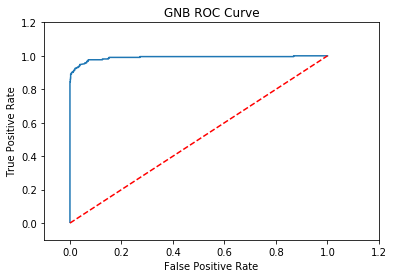

In [8]:
# plot the ROC Curve
mnb_fpr, mnb_tpr, mnb_thresholds = roc_curve(test_label, mnb_pred_proba)
plt.plot(mnb_fpr, mnb_tpr)
plt.plot([0,1],[0,1],'r--')
plt.title("GNB ROC Curve")
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [9]:
print('AUC Score:' , roc_auc_score(test_label, mnb_pred_proba))

AUC Score: 0.9895014861721374


In [10]:
print('Accuracy Score:', accuracy_score(test_label, mnb_predictions))

Accuracy Score: 0.97188995215311


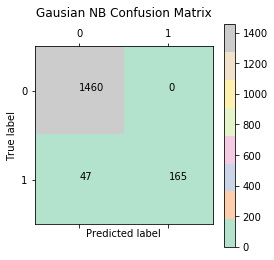

In [11]:
# create and plot the confusion matrix
mnb_cm = confusion_matrix(test_label, mnb_predictions)

plt.matshow(mnb_cm, cmap='Pastel2')

i = 0
j = 0
for i in range(mnb_cm.shape[0]):
    for j in range(mnb_cm.shape[1]):
        plt.text(i, j, mnb_cm[j][i])

plt.title('Gausian NB Confusion Matrix', y=1.13)

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()    

In [12]:
# stored the values in the confusion matrix into variables
mnb_TP = mnb_cm[1, 1]
mnb_TN = mnb_cm[0, 0]
mnb_FP = mnb_cm[0, 1]
mnb_FN = mnb_cm[1, 0]

print('True Positive', mnb_TP)
print('True Negative', mnb_TN)
print('False Positive', mnb_FP)
print('False Negative', mnb_FN)
print("")

# calculate Precision and Specificity
print("MNB Precision:", precision_score(test_label, mnb_predictions))
mnb_specificity = mnb_TN / float(mnb_TN + mnb_FP)
print("MNB Specificity:", mnb_specificity)

True Positive 165
True Negative 1460
False Positive 0
False Negative 47

MNB Precision: 1.0
MNB Specificity: 1.0


# Random Forests

In [13]:
# create the classifier
rf = RandomForestClassifier()

# fit and make predictions based off of the fitted model
rf.fit(train_feat_cv, train_label)
rf_predictions = rf.predict(test_feat_cv)
rf_pred_proba = rf.predict_proba(test_feat_cv)[:, 1]

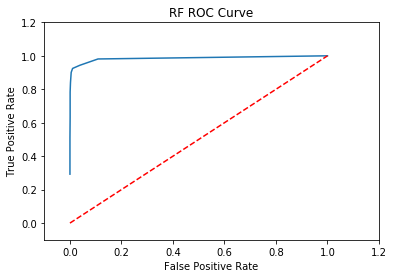

In [14]:
# plot the ROC Curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_label, rf_pred_proba)
plt.plot(rf_fpr, rf_tpr)
plt.plot([0,1],[0,1],'r--')
plt.title("RF ROC Curve")
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
print('AUC Score:' , roc_auc_score(test_label, rf_pred_proba) * 100, "%")

AUC Score: 98.56907469630396 %


In [16]:
print('Accuracy Score: ', accuracy_score(test_label, mnb_predictions))

Accuracy Score:  0.97188995215311


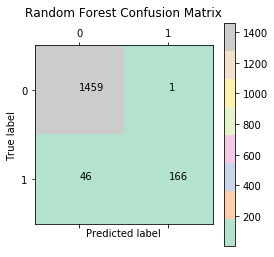

In [17]:
# create and plot the confusion matrix
rf_cm = confusion_matrix(test_label, rf_predictions)
plt.matshow(rf_cm, cmap='Pastel2')

i = 0
j = 0
for i in range(rf_cm.shape[0]):
    for j in range(rf_cm.shape[1]):
        plt.text(i, j, rf_cm[j][i])

plt.title('Random Forest Confusion Matrix', y=1.13)

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()    

In [18]:
# stored the values in the confusion matrix into variables
rf_TP = rf_cm[1, 1]
rf_TN = rf_cm[0, 0]
rf_FP = rf_cm[0, 1]
rf_FN = rf_cm[1, 0]

print('True Positive', rf_TP)
print('True Negative', rf_TN)
print('False Positive', rf_FP)
print('False Negative', rf_FN)
print('')

# calculate Precision and Specificity
print("RF Precision:", precision_score(test_label, rf_predictions))
rf_specificity = rf_TN / float(rf_TN + rf_FP)
print("RF Specificity:", rf_specificity)

True Positive 166
True Negative 1459
False Positive 1
False Negative 46

RF Precision: 0.9940119760479041
RF Specificity: 0.9993150684931507


# Logistic Regression

In [27]:
# create the classifier
lr = LogisticRegression()

# fit and make predictions based off of the fitted model
lr.fit(train_feat_cv, train_label)
lr_predictions = lr.predict(test_feat_cv)
lr_pred_proba = lr.predict_proba(test_feat_cv)[:, 1]

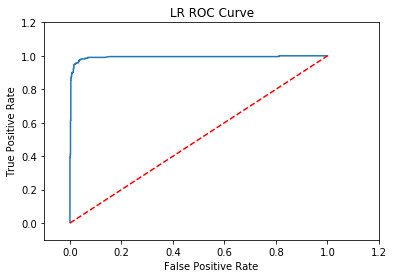

In [28]:
# plot the ROC Curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(test_label, lr_pred_proba)
plt.plot(lr_fpr, lr_tpr)
plt.title("LR ROC Curve")
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
print('AUC Score:' , roc_auc_score(test_label, lr_pred_proba) * 100, "%")

AUC Score: 99.16467433445334 %


In [30]:
print('Accuracy Score:', accuracy_score(test_label, lr_predictions))

Accuracy Score: 0.9569377990430622


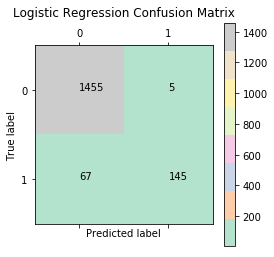

In [22]:
# create and plot the confusion matrix
lr_cm = confusion_matrix(test_label, lr_predictions)
plt.matshow(lr_cm, cmap='Pastel2')

i = 0
j = 0
for i in range(lr_cm.shape[0]):
    for j in range(lr_cm.shape[1]):
        plt.text(i, j, lr_cm[j][i])

plt.title('Logistic Regression Confusion Matrix', y=1.13)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()    

In [23]:
# stored the values in the confusion matrix into variables
lr_TP = lr_cm[1, 1]
lr_TN = lr_cm[0, 0]
lr_FP = lr_cm[0, 1]
lr_FN = lr_cm[1, 0]

print('True Positive', lr_TP)
print('True Negative', lr_TN)
print('False Positive', lr_FP)
print('False Negative', lr_FN)
print("")

# calculate Precision and Specificity
print("LR Precision:", precision_score(test_label, lr_predictions))
lr_specificity = lr_TN / float(lr_TN + lr_FP)
print("LR Specificity:", lr_specificity)

True Positive 145
True Negative 1455
False Positive 5
False Negative 67

LR Precision: 0.9666666666666667
LR Specificity: 0.9965753424657534
